In [6]:
import numpy as np
import pandas as pd

In [7]:
data=pd.read_csv("Indian_cities.csv")

In [8]:
data

,City,Lat,Long,country,iso2,State
0,Abohar,30.144533,74.195520,India,IN,Punjab
1,Adilabad,19.400000,78.310000,India,IN,Telangana
2,Agartala,23.836049,91.279386,India,IN,Tripura
3,Agra,27.187935,78.003944,India,IN,Uttar Pradesh
4,Ahmadnagar,19.094571,74.738432,India,IN,Maharashtra
...,...,...,...,...,...,...
208,Vizianagaram,18.113290,83.397743,India,IN,Andhra Pradesh
209,Warangal,17.978423,79.600209,India,IN,Telangana
210,Jorapokhar,23.700000,86.412670,India,IN,Jharkhand
211,Brajrajnagar,21.820000,83.920000,India,IN,Odisha


In [9]:
graph={}
def graph_creation():
    global graph
    for index, row in data.iterrows():
        graph[row['City']]=(row['Lat'],row['Long'],row['State'].strip())

graph_creation()
print(graph)

{'Abohar': (30.144533, 74.19552, 'Punjab'), 'Adilabad': (19.4, 78.31, 'Telangana'), 'Agartala': (23.836049, 91.279386, 'Tripura'), 'Agra': (27.187935, 78.003944, 'Uttar Pradesh'), 'Ahmadnagar': (19.094571, 74.738432, 'Maharashtra'), 'Ahmedabad': (23.025793, 72.587265, 'Gujarat'), 'Aizawl  ': (23.736701, 92.714596, 'Mizoram'), 'Ajmer': (26.452103, 74.638667, 'Rajasthan'), 'Akola': (20.709569, 76.998103, 'Maharashtra'), 'Alappuzha': (9.494647, 76.331108, 'Kerala'), 'Aligarh': (27.881453, 78.07464, 'Uttar Pradesh'), 'Alipurduar': (26.4835, 89.522855, 'West Bengal'), 'Allahabad': (25.44478, 81.843217, 'Uttar Pradesh'), 'Alwar': (27.566291, 76.610202, 'Rajasthan'), 'Ambala': (30.360993, 76.797819, 'Haryana'), 'Amaravati': (20.933272, 77.75152, 'Maharashtra'), 'Amritsar': (31.622337, 74.875335, 'Punjab'), 'Asansol': (23.683333, 86.983333, 'West Bengal'), 'Aurangabad': (24.752037, 84.374202, 'Bihar'), 'Bakshpur': (25.894283, 80.792104, 'Uttar Pradesh'), 'Bamanpuri': (28.804495, 79.040305, 'Ut

In [10]:
#Calculates distance between adjacent cities
def calculate_distance(coord1, coord2):
    lat1, lon1 ,state1= coord1
    lat2, lon2 ,state2= coord2

    R = 6371  
    diff_lat = np.radians(lat2 - lat1)
    diff_lon = np.radians(lon2 - lon1)

    a = np.sin(diff_lat/2)**2 + np.cos(np.radians(lat1))*np.cos(np.radians(lat2))*np.sin(diff_lon/2)** 2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

In [11]:
adjacency_list1={}

def adjacency_list_creation(graph):
    global adjacency_list1

    cities = list(graph.keys())

    for i in range(len(cities)):
        city_adjacency = []
        for j in range(len(cities)):
            if i != j:
                distance = calculate_distance(graph[cities[i]], graph[cities[j]])
                
                if distance < 250 or (graph[cities[i]][-1]==graph[cities[j]][-1]):
                    city_adjacency.append(cities[j])

        adjacency_list1[cities[i]] = city_adjacency

adjacency_list_creation(graph)
print(adjacency_list1)
    

{'Abohar': ['Amritsar', 'Bhiwani', 'Haripur', 'Hisar', 'Ludhiana', 'Pathankot', 'Patiala', 'Sirsa'], 'Adilabad': ['Akola', 'Amaravati', 'Bidar', 'Chanda', 'Hyderabad', 'Kagaznagar', 'Karimnagar', 'Khammam', 'Latur', 'Mahabubnagar', 'Nalgonda', 'Nanded', 'Nizamabad', 'Parbhani', 'Ramagundam', 'Warangal'], 'Agartala': ['Aizawl  ', 'Shillong ', 'Silchar'], 'Agra': ['Aligarh', 'Allahabad', 'Alwar', 'Bakshpur', 'Bamanpuri', 'Bareilly', 'Bharatpur', 'Bharauri', 'Budaun', 'Bulandshahr', 'Delhi', 'Faridabad', 'Firozabad', 'Fyzabad', 'Ghaziabad', 'Gopalpur', 'Gurugram', 'Gwalior', 'Hapur', 'Hata', 'Jaipur', 'Jhansi', 'Lucknow', 'Mathura', 'Meerut', 'Mirzapur', 'Moradabad', 'Muzaffarnagar', 'New Delhi', 'Pilibhit', 'Rampura', 'Rohtak', 'Saharanpur', 'Saidapur', 'Shahbazpur', 'Sonipat', 'Tharati Etawah', 'Tonk', 'Varanasi'], 'Ahmadnagar': ['Akola', 'Amaravati', 'Bhiwandi', 'Bhusaval', 'Chanda', 'Daman', 'Kalyan', 'Khanapur', 'Kolhapur', 'Latur', 'Malegaon Camp', 'Mumbai', 'Nanded', 'Nasik', 'Parb

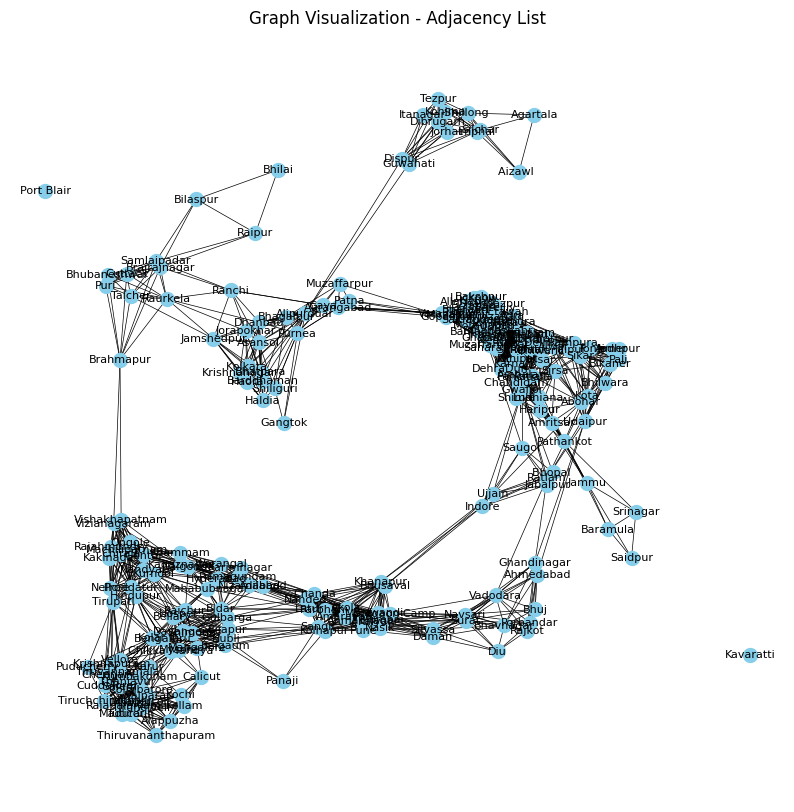

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph from the adjacency list
G = nx.Graph(adjacency_list1)

plt.figure(figsize=(10, 10))

# Layout for better visualization with increased node separation
pos = nx.spring_layout(G, k=0.2)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

plt.title("Graph Visualization - Adjacency List")
plt.axis('off')
plt.show()


In [22]:
from math import sqrt
import heapq

def heuristic(point1, point2):
    x1, y1 ,state1= point1
    x2, y2 ,state2= point2
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance


def astar(ad_list, start, goal, graph):
    open_set = [(0, start)]
    came_from = {}
    g_score = {city: float('inf') for city in ad_list.keys()}
    g_score[start] = 0

    while open_set:
        current_score, current_city = heapq.heappop(open_set)

        if current_city == goal:
            path = make_path(came_from, start, goal)
            return path, g_score[goal]

        for neighbor in ad_list[current_city]:
            distance = calculate_distance(graph[current_city], graph[neighbor])

            tentative_g_score = g_score[current_city] + distance

            if tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(graph[neighbor], graph[goal])
                heapq.heappush(open_set, (f_score, neighbor))
                came_from[neighbor] = current_city

    return None, None

def make_path(came_from, start, goal):
    path = [goal]
    while goal != start:
        goal = came_from[goal]
        path.append(goal)
    return path[::-1]

start=input("Enter start location: ").strip()
goal=input("Enter destination: ").strip()

path, distance = astar(adjacency_list1, start, goal,graph)

if path and distance:
    print(f"The shortest route between {start} and {goal} is :{' -> '.join(path)}")
    print(f'Total distance: {distance}km')
else:
    print(f"No feasible path between {start} and {goal}")

Enter start location: Chennai
Enter destination: Hyderabad
The shortest route between Chennai and Hyderabad is :Chennai -> Tirupati -> Nandyal -> Hyderabad
Total distance: 548.8380035683489km
